In [13]:
#all packages and dataframes
import numpy as np
import classification
import os
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import ptitprince as pt
from matplotlib import colors as mcolors
%matplotlib inline
# Initialization of directory information:
thisDir = os.path.expanduser('~/Desktop/MSC_Alexis/analysis/')
outDir = thisDir + 'output/mLmax/results/ridge/'
subDir=outDir+'subNetwork/'
randDir=outDir+'randomIdx/'
Parcel_params = classification.loadParcelParams('Gordon333',thisDir+'data/Parcel_info/')
taskList=['mem','mixed','motor']
netList=['unassign','default', 'visual','fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon']
feature=[14808,10824,8736, 4620,5264,3151, 484, 4060, 2375,316, 564,45,21]
netRoi=dict([('unassign',14808),('default', 10824),('visual',8736),('fp', 4620),('dan',5264),('van',3151),('salience', 484),('co', 4060),('sm', 2375),('sm-lat', 316),('auditory', 564),('pmn',45),('pon',21)])
sns.set_style("white")
sns.set_context("talk")
# Gordan Palette
enmax_palette = Parcel_params['net_colors']
color_codes_wanted = Parcel_params['networks']
cdict = dict(zip(color_codes_wanted, [mcolors.to_rgba(c) for c in enmax_palette]))
mcolors.get_named_colors_mapping().update(cdict)


#same task folds dataframes
DS_violin=pd.read_csv(outDir+'acc/DS/folds/allFolds.csv')
DS_violin['Analysis']='Diff Sub'
CV=pd.read_csv(outDir+'acc/CV/reformedFolds.csv')
CV.drop(columns='sub', inplace=True)
CV['Analysis']='Same Sub'
frames=[DS_violin, CV]
sameTask=pd.concat(frames)


#Visualizing change scores from within to between
t_CV=pd.read_csv(outDir+'acc/CV/acc.csv')
t_DS=pd.read_csv(outDir+'acc/DS/acc.csv', usecols=[1,2,3,4])
pairCV=pd.melt(t_CV,id_vars=['sub'],value_vars=['mixed','motor','mem'], var_name='task', value_name='acc')
pairDS=pd.DataFrame()
for task in taskList:
    tmp=t_DS[(t_DS['task']==task)]
    tmp_mu=tmp.groupby(['train_sub']).mean()
    tmp_mu['task']=task
    pairDS=pd.concat([pairDS,tmp_mu])
pairDS.reset_index(inplace=True)
pairDS.rename(columns={'train_sub':'sub'},inplace=True)
pairDS['Analysis']='Between'
pairCV['Analysis']='Within'
pair_res=pd.concat([pairDS, pairCV])
#motor
pair_motor=pair_res[pair_res.task=='motor']
#mixed
pair_mixed=pair_res[pair_res.task=='mixed']
#memory
pair_mem=pair_res[pair_res.task=='mem']

#change scores diff task same/diff sub
SS_diff=pd.read_csv(outDir+'acc/SS/stats.csv', usecols=[1,2,3])
SS_diff['analysis']='Within'
BS_diff=pd.read_csv(outDir+'acc/BS/stats.csv', usecols=[1,2,3])
BS_diff['analysis']='Between'
diff_res=pd.concat([SS_diff, BS_diff])
#motor
diff_motor=diff_res[diff_res.train_task=='motor']
#mixed
diff_mixed=diff_res[diff_res.train_task=='mixed']
#memory
diff_mem=diff_res[diff_res.train_task=='mem']

#plotACC of heatmaps for DS analysis
DS_heat=pd.read_csv(outDir+'acc/DS/acc.csv', usecols=[1,2,3,4])

#different task analysis comparison does not require opening dataframe

#all statistics related tables will be computes in a separate script

#subnetworks overlapped with random network sampling
SS_nets=pd.DataFrame()
DS_nets=pd.DataFrame()
CV_nets=pd.DataFrame()
BS_nets=pd.DataFrame()
for i in netList:
    tmpSS=pd.read_csv(subDir+i+'/SS/acc.csv')
    #tmpSS['Analysis']='ridge'
    tmpSS['Network']=i
    tmpSS['Features']=netRoi[i]
    SS_nets=pd.concat([SS_nets,tmpSS])
    
    tmpDS=pd.read_csv(subDir+i+'/DS/acc.csv')
    tmpDS['Network']=i
    tmpDS['Features']=netRoi[i]
    DS_nets=pd.concat([DS_nets,tmpDS])
    
    tmpBS=pd.read_csv(subDir+i+'/BS/acc.csv')
    tmpBS['Network']=i
    tmpBS['Features']=netRoi[i]
    BS_nets=pd.concat([BS_nets,tmpBS])
    
    tmpCV=pd.read_csv(subDir+i+'/CV/acc.csv')
    tmpCV=tmpCV.melt(id_vars='sub', value_vars=['mixed', 'motor','mem'], var_name='Task', value_name='Accuracy')
    tmpCV['Network']=i
    tmpCV['Features']=netRoi[i]
    CV_nets=pd.concat([CV_nets,tmpCV])
    
    
SS_nets.drop(columns='Unnamed: 0', inplace=True)
DS_nets.drop(columns='Unnamed: 0', inplace=True)
BS_nets.drop(columns='Unnamed: 0', inplace=True)
CV_nets.rename(columns={'Accuracy':'acc'},inplace=True)

rand_CV=pd.read_csv(randDir+'CV/all.csv', usecols=[1,2,3])
rand_SS=pd.read_csv(randDir+'SS/all.csv',usecols=[1,2,3,4,5])
rand_DS=pd.read_csv(randDir+'DS/all.csv',usecols=[1,2,3,4,5])
rand_BS=pd.read_csv(randDir+'BS/all.csv',usecols=[1,2,3,4,5,6])
#netRoi
#netRoi
SStotal=[]
DStotal=[]
CVtotal=[]
BStotal=[]
for i in netList:
    #CV
    CVtmp=CV_nets[(CV_nets['Network']==i)].acc.values
    CVacc=CVtmp.mean()
    CVtotal.append(CVacc)
    #SS
    SStmp=SS_nets[(SS_nets['Network']==i)].acc.values
    SSacc=SStmp.mean()
    SStotal.append(SSacc)
    #DS
    DStmp=DS_nets[(DS_nets['Network']==i)].acc.values
    DSacc=DStmp.mean()
    DStotal.append(DSacc)
    #BS
    BStmp=BS_nets[(BS_nets['Network']==i)].acc.values
    BSacc=BStmp.mean()
    BStotal.append(BSacc)

CV_mu=pd.DataFrame({'Network':netList, 'Acc':CVtotal,'Features':feature})
SS_mu=pd.DataFrame({'Network':netList, 'Acc':SStotal,'Features':feature})
DS_mu=pd.DataFrame({'Network':netList, 'Acc':DStotal,'Features':feature})
BS_mu=pd.DataFrame({'Network':netList, 'Acc':BStotal,'Features':feature})


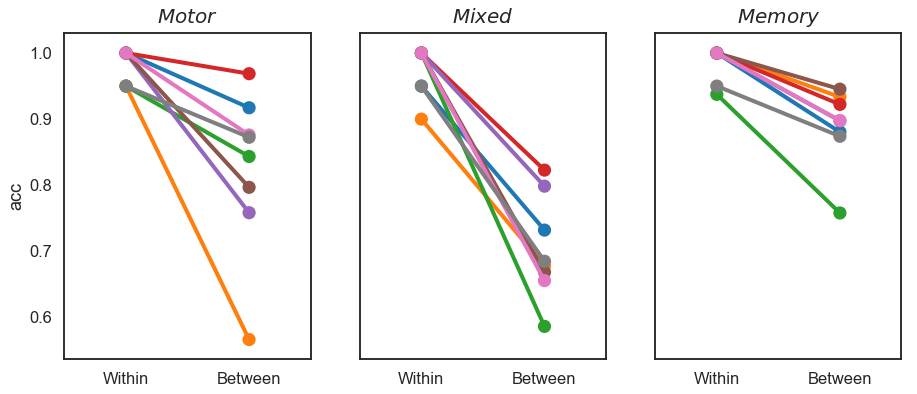

In [12]:
#Create figure space
fig=plt.figure(figsize=(15,6), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True
#Add grid space for subplots 1 rows by 3 columns
gs = gridspec.GridSpec(nrows=1, ncols=3)
#motor
ax1=fig.add_subplot(gs[0,0])
ax=sns.pointplot(x="Analysis",y="acc", hue="sub", ci=None, data=pair_motor, ax=ax1, order=['Within','Between'])
ax.legend_.remove()
ax.set_title('$Motor$', fontsize=20, pad=10)
plt.xlabel('')
#mixed
ax2=fig.add_subplot(gs[0,1],sharey=ax1)
plt.setp(ax2.get_yticklabels(), visible=False)
ax=sns.pointplot(x="Analysis",y="acc", hue="sub", ci=None, data=pair_mixed, ax=ax2, order=['Within','Between'])
ax.legend_.remove()
ax.set_title('$Mixed$', fontsize=20, pad=10)
plt.ylabel('')
plt.xlabel('')
#memory
ax3=fig.add_subplot(gs[0,2],sharey=ax1)
plt.setp(ax3.get_yticklabels(), visible=False)
ax=sns.pointplot(x="Analysis",y="acc", hue="sub", ci=None, data=pair_mem,ax=ax3, order=['Within','Between'])
ax.legend_.remove()
ax.set_title('$Memory$', fontsize=20, pad=10)
plt.ylabel('')
plt.xlabel('')

plt.savefig(thisDir+'output/mLmax/images/ridge/figs/point_plots.png', bbox_inches='tight')

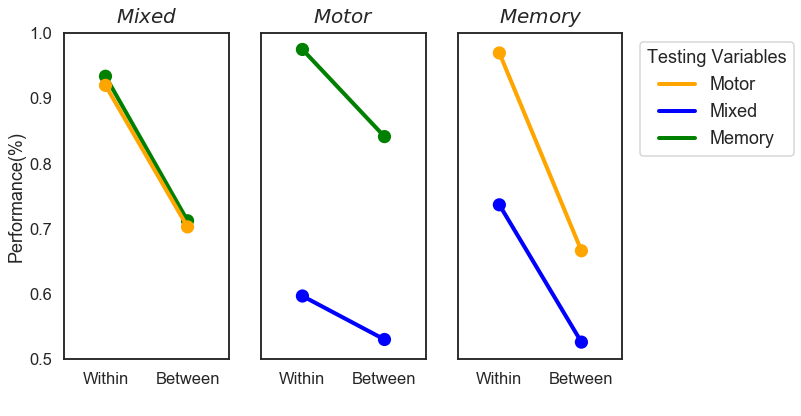

In [7]:
#separating out the different tasks 
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='orange', lw=4),
                Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='green', lw=4)]
#Create figure space
fig=plt.figure(figsize=(10,6), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True
#Add grid space for subplots 1 rows by 3 columns
gs = gridspec.GridSpec(nrows=1, ncols=3)
#Mixed
ax1=fig.add_subplot(gs[0,0])
ax=sns.pointplot(x="analysis",y="Mean", hue="test_task",palette=['green','orange'], ci=None, data=diff_mixed, ax=ax1)
ax.legend_.remove()
y=[.5,.6,.7,.8,.9,1.0]
plt.yticks(y)
plt.ylabel("Performance(%)")
ax.set_title('$Mixed$', fontsize=20, pad=10)
ax.set(xlabel=' ')
#Motor
ax2=fig.add_subplot(gs[0,1])
plt.setp(ax2.get_yticklabels(), visible=False)
ax=sns.pointplot(x="analysis",y="Mean", hue="test_task", ci=None, palette=['green','blue'], data=diff_motor, ax=ax2)
ax.legend_.remove()
ax.set_title('$Motor$', fontsize=20, pad=10)
ax.set(xlabel=' ')
ax.set(ylabel=' ')
#Memory
ax3=fig.add_subplot(gs[0,2])
plt.setp(ax3.get_yticklabels(), visible=False)
ax=sns.pointplot(x="analysis",y="Mean", hue="test_task", ci=None, palette=['blue','orange'], data=diff_mem, ax=ax3)
ax.set_title('$Memory$', fontsize=20, pad=10)
ax.set(xlabel=' ')
ax.set(ylabel=' ')
ax.legend(custom_lines, ['Motor', 'Mixed', 'Memory'],loc='upper right',fontsize='medium',bbox_to_anchor=(2.1, 1),title='Testing Variables')
plt.savefig(thisDir+'output/mLmax/images/ridge/figs/sep_taskpoint_plots.png', bbox_inches='tight')

No handles with labels found to put in legend.


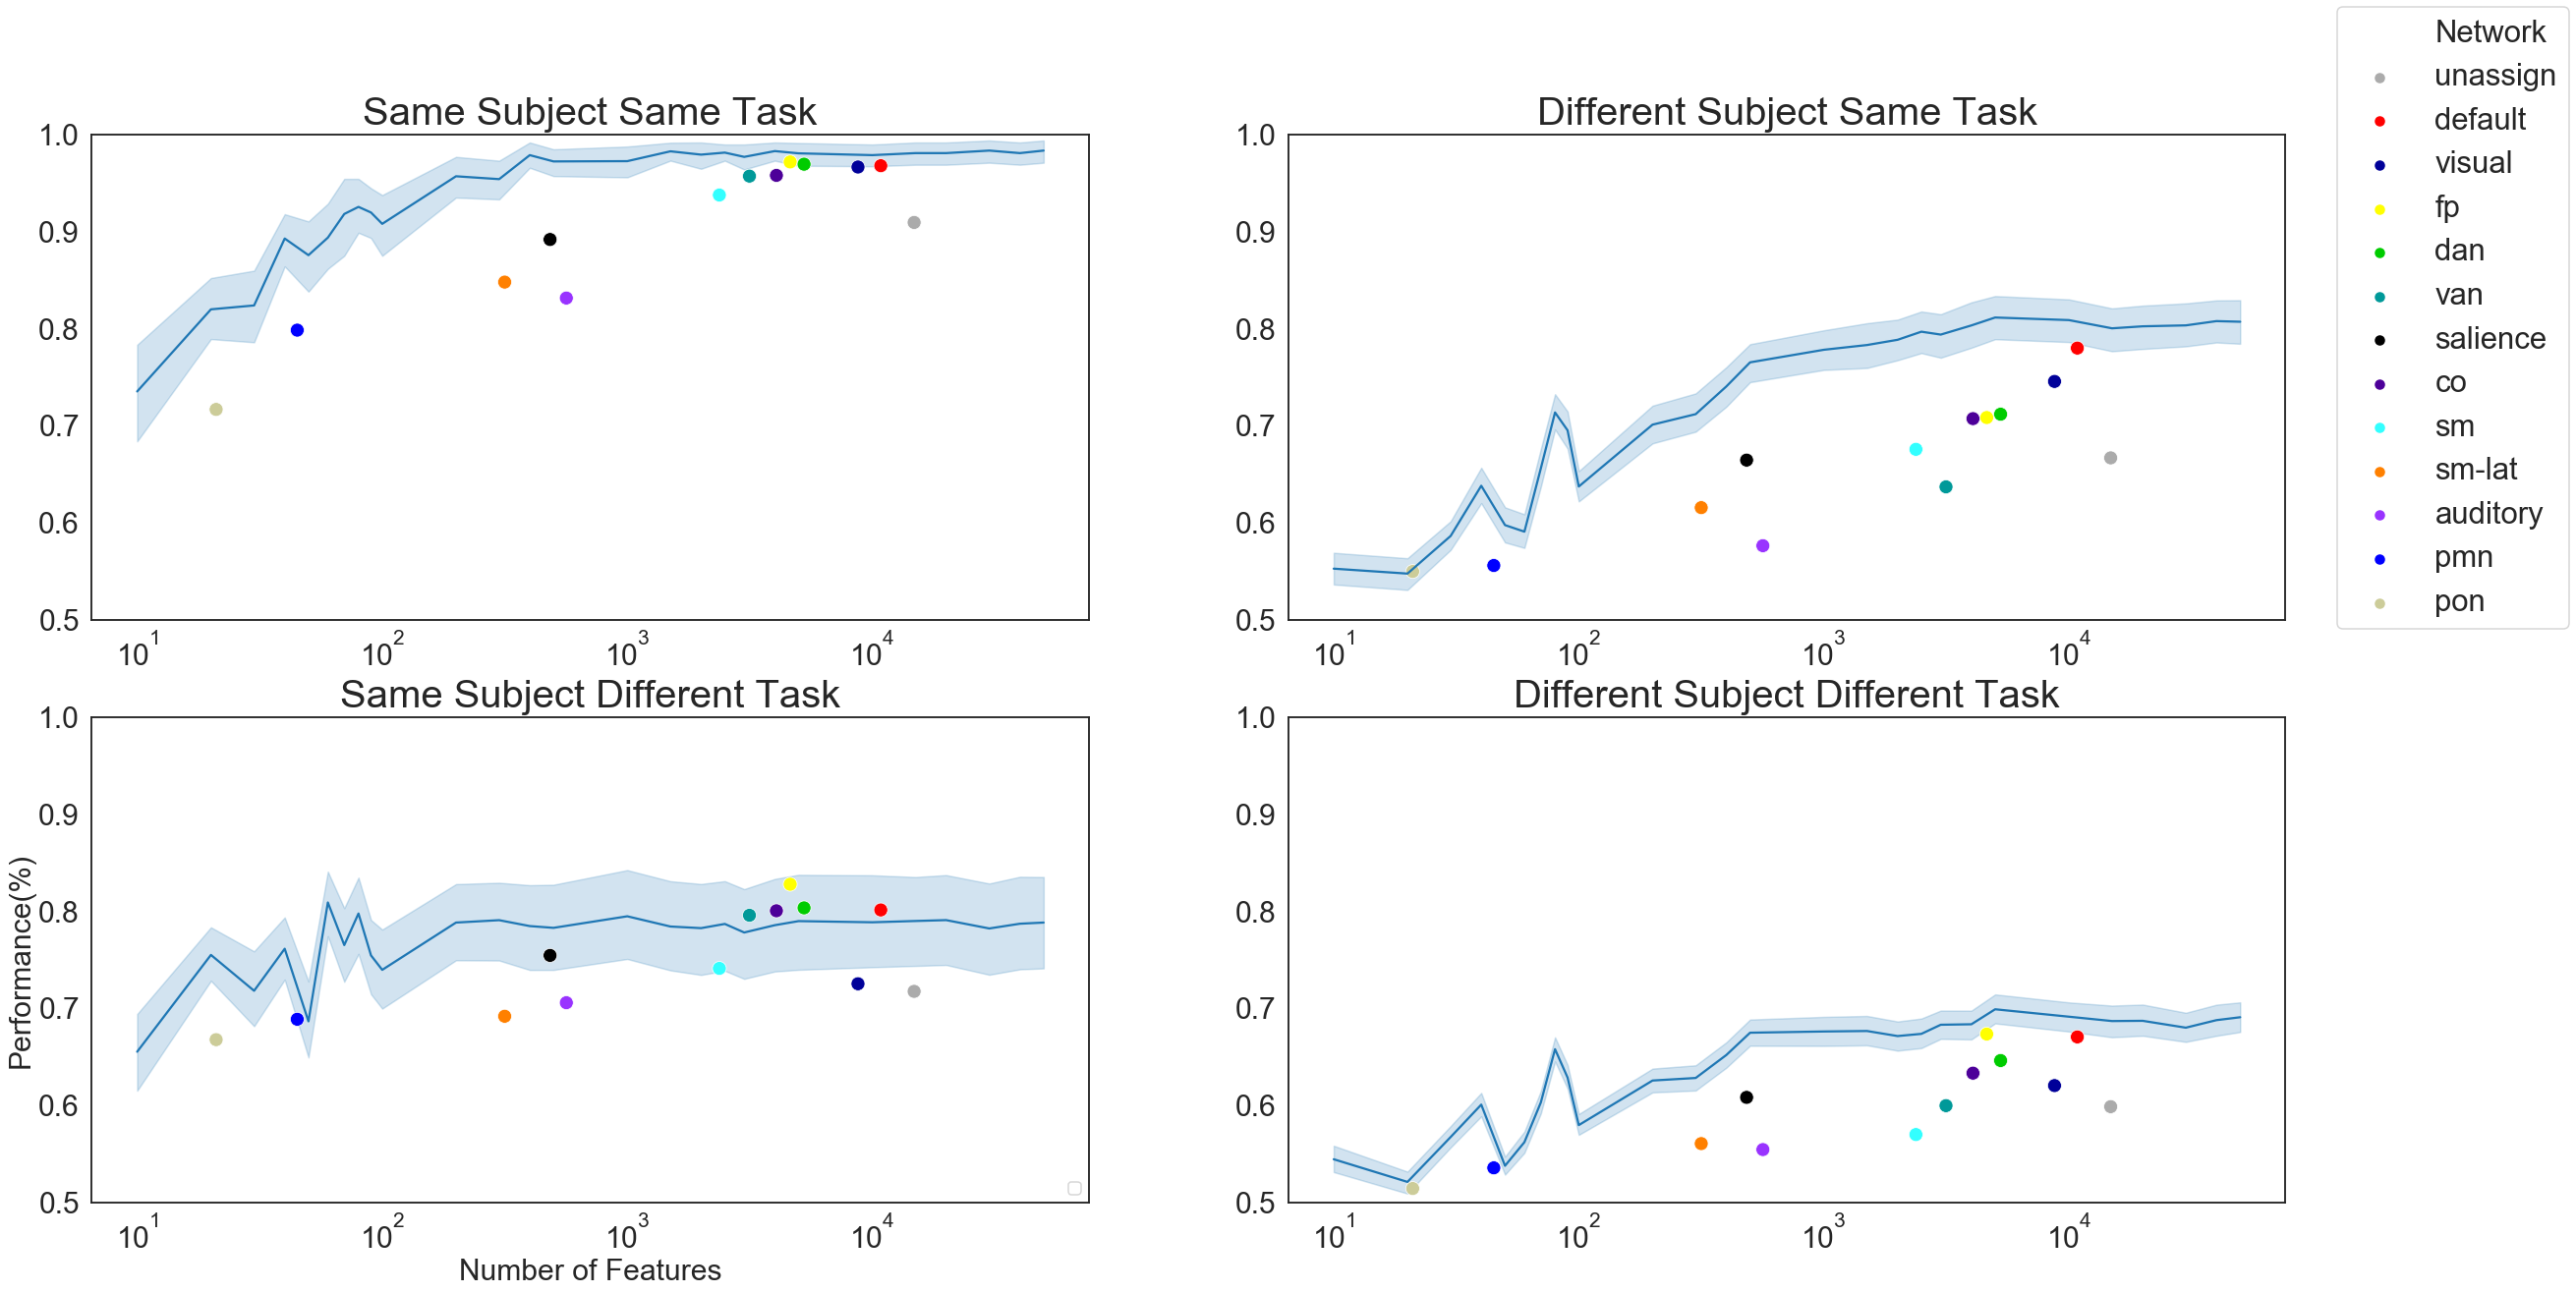

In [14]:
#lineplots overlapping subnetwork analysis
#Create figure space
fig=plt.figure(figsize=(40,20), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True
#Add grid space for subplots 2 rows by 2 columns
gs = gridspec.GridSpec(nrows=2, ncols=2)

#CV
ax1=fig.add_subplot(gs[0,0])
ax = sns.lineplot(x="Features", y="Accuracy",data=rand_CV, ax=ax1)
ax.set(xscale="log")
g=sns.scatterplot(x='Features', y='Acc', hue='Network', data=CV_mu, ax=ax1, color='r',s=200,legend=False,palette=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'])
#g.legend(loc='lower right')
ax.set_title('Same Subject Same Task',fontsize=40, pad=10)
ax.set_ylabel('')
ax.set_xlabel('')
ax.set(ylim=(.5, 1))
ax.tick_params(labelsize=30)

#DS
ax2=fig.add_subplot(gs[0,1])
ax = sns.lineplot(x="Features", y="acc",data=rand_DS, ax=ax2)
ax.set(xscale="log")
g=sns.scatterplot(x='Features', y='Acc', hue='Network', data=DS_mu, ax=ax2, color='r',s=200,palette=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'])
g.legend(loc='lower right')
ax.set_title('Different Subject Same Task',fontsize=40, pad=10)
ax.set_ylabel('')
ax.set_xlabel('')
ax.set(ylim=(.5, 1))
ax.tick_params(labelsize=30)
plt.legend(bbox_to_anchor=(1.3, -0.05),loc='lower right',fontsize='xx-large')

#SS
ax3=fig.add_subplot(gs[1,0])
ax = sns.lineplot(x="Features", y="acc",data=rand_SS, ax=ax3)
ax.set(xscale="log")
g=sns.scatterplot(x='Features', y='Acc', hue='Network', data=SS_mu, ax=ax3, color='r',s=200,legend=False,palette=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'])
g.legend(loc='lower right')
ax.set_title('Same Subject Different Task',fontsize=40, pad=10)
ax.set_ylabel("Performance(%)", fontsize=30)
ax.set_xlabel('Number of Features',fontsize=30)
ax.set(ylim=(.5, 1))
ax.tick_params(labelsize=30)

#BS
ax4=fig.add_subplot(gs[1,1])
ax = sns.lineplot(x="Features", y="acc",data=rand_BS, ax=ax4)
ax.set(xscale="log")
g=sns.scatterplot(x='Features', y='Acc', hue='Network', data=BS_mu, ax=ax4, color='r',s=200,legend=False,palette=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'])
ax.set_title('Different Subject Different Task',fontsize=40, pad=10)
ax.set_ylabel('')
ax.set_xlabel('')
ax.set(ylim=(.5, 1))
ax.tick_params(labelsize=30)
#fig.text(0.075, 0.5, "Performance(%)", rotation="vertical", va="center", fontsize="30")
#fig.text(0.45, 0.07, 'Number of Features', rotation="horizontal", va="center", fontsize="30")
plt.savefig(thisDir+'output/mLmax/images/ridge/figs/feature_plots.png', bbox_inches='tight')

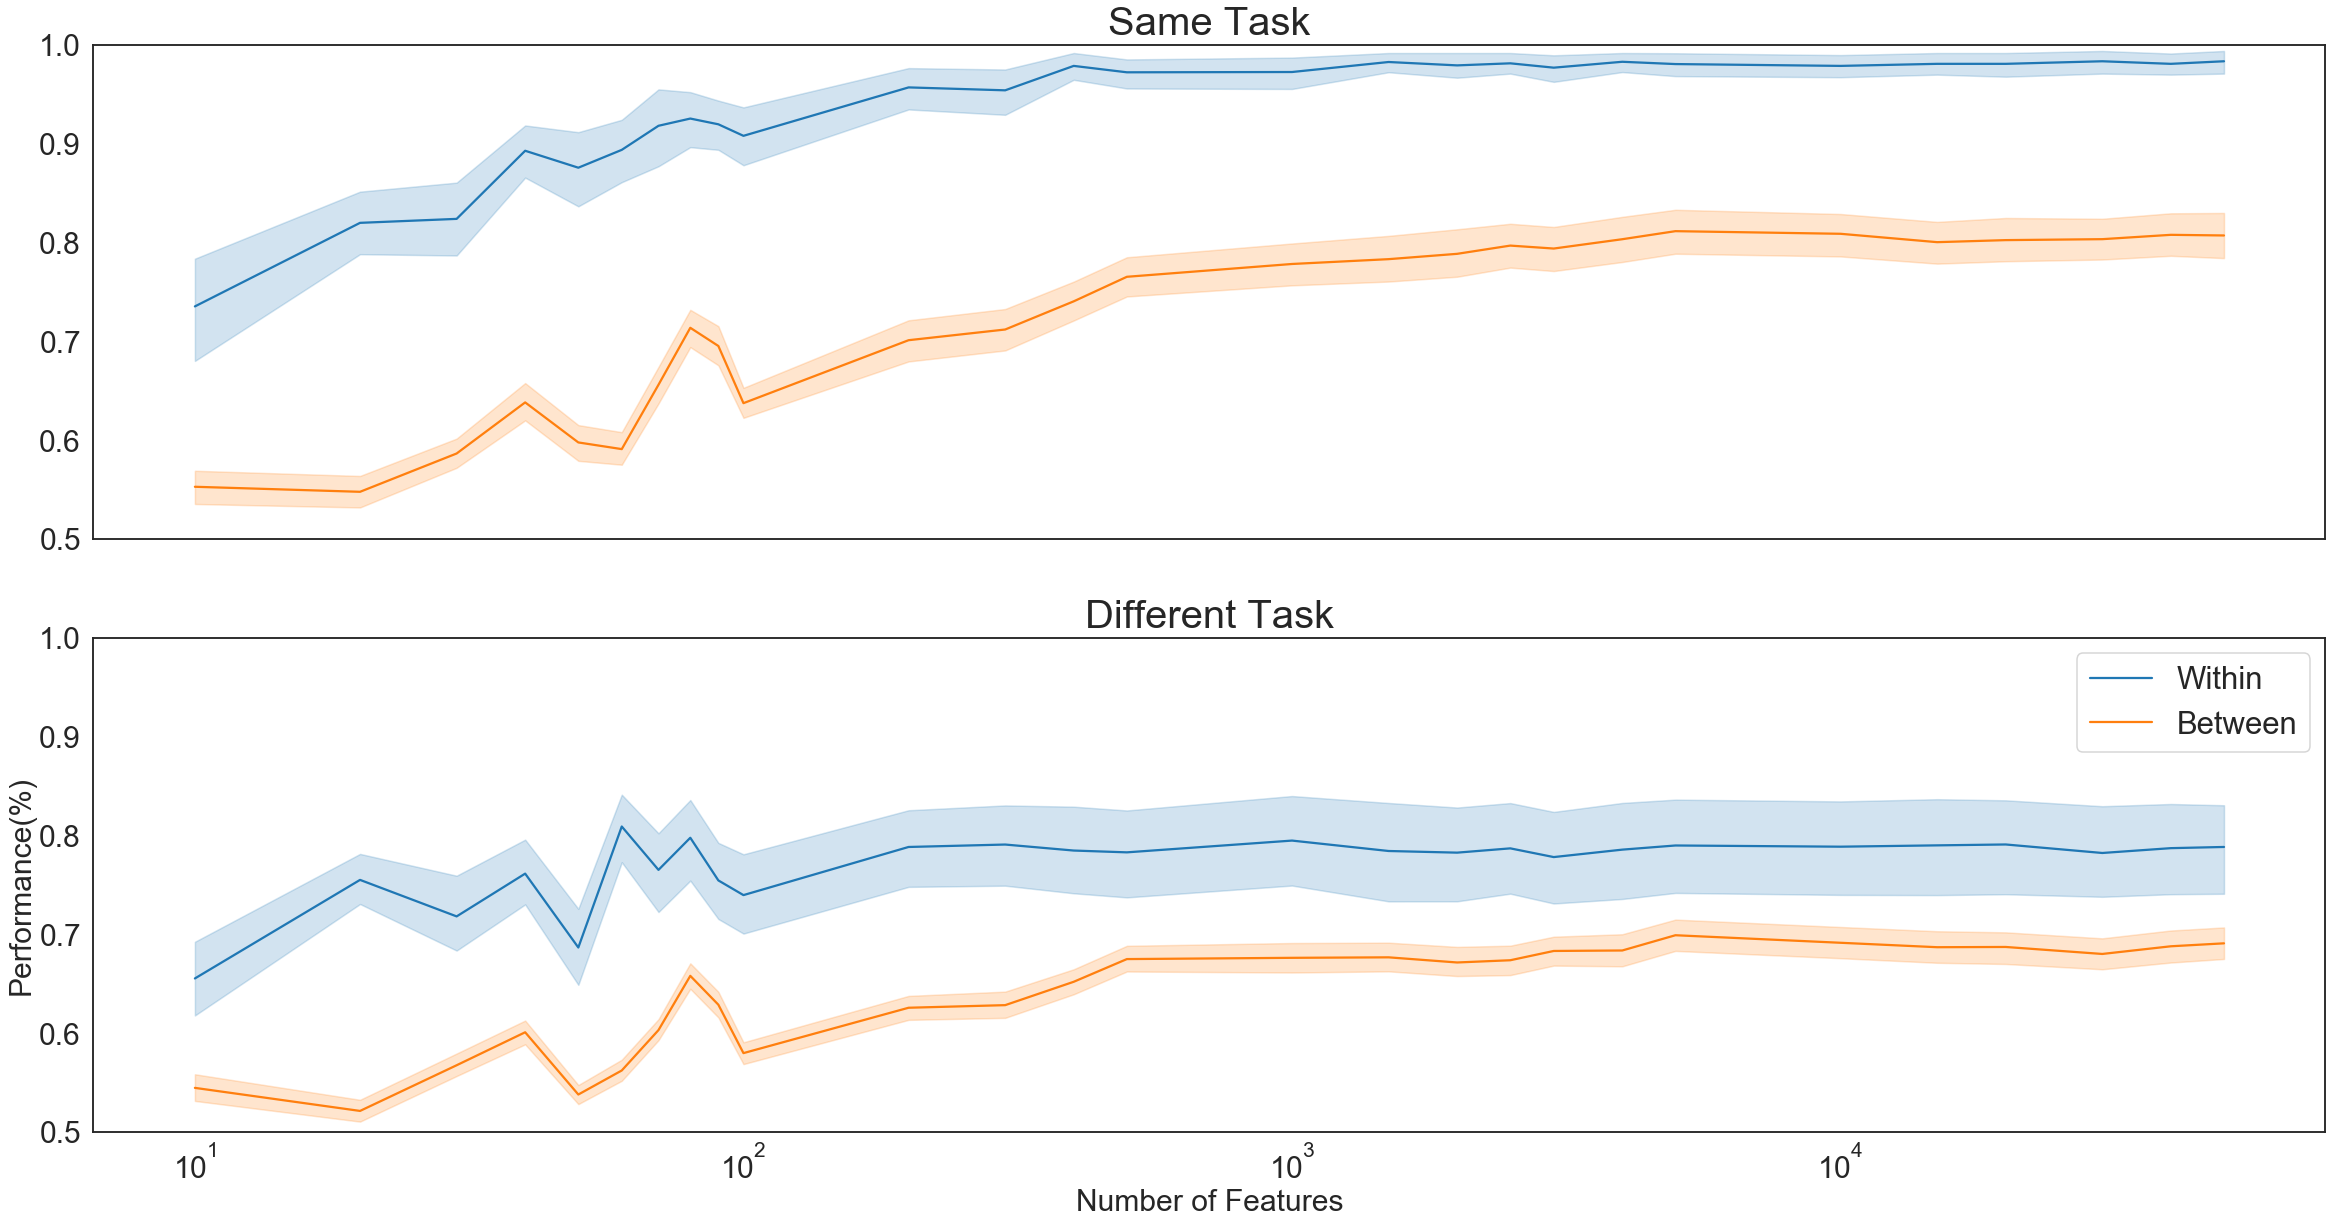

In [11]:
#lineplots random feature selection comparison of within and between 
#Create figure space
fig=plt.figure(figsize=(40,20), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True
#Add grid space for subplots 2 rows by 2 columns
gs = gridspec.GridSpec(nrows=2, ncols=1)

#Same task comparison within and between 
ax1=fig.add_subplot(gs[0,0])
plt.setp(ax1.get_xticklabels(), visible=False)
ax = sns.lineplot(x="Features", y="Accuracy",data=rand_CV, ax=ax1)
ax.set(xscale="log")
g = sns.lineplot(x="Features", y="acc",data=rand_DS, ax=ax1)
ax.set_title('Same Task',fontsize=40, pad=10)
ax.set_ylabel('')
ax.set_xlabel('')
ax.set(ylim=(.5, 1))
ax.tick_params(labelsize=30)

#Diff task comparison within and between
ax2=fig.add_subplot(gs[1,0])
ax = sns.lineplot(x="Features", y="acc",data=rand_SS, ax=ax2)
g = sns.lineplot(x="Features", y="acc",data=rand_BS, ax=ax2)
ax.set(xscale="log")
ax.set_title('Different Task',fontsize=40, pad=10)
ax.set_ylabel("Performance(%)", fontsize=30)
ax.set_xlabel('Number of Features',fontsize=30)
ax.set(ylim=(.5, 1))
ax.tick_params(labelsize=30)
ax.legend(('Within', 'Between'),loc='upper right',fontsize='xx-large')
plt.savefig(thisDir+'output/mLmax/images/ridge/figs/comb_feature_plots.png', bbox_inches='tight')